In [38]:
import torchvision.models as models
from torch import nn
import torch
from models.adain_sf import AdaINTransfer
import os
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from data.unnormalize import UnNormalize

In [39]:
content_image = Image.open("./dataset/train_content_images/2013-11-08 16_45_24.jpg").convert("RGB")
style_image = Image.open("./dataset/train_style_images/00001.jpg").convert("RGB")

In [40]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

In [41]:
content = transform(content_image).unsqueeze(0)
style = transform(style_image).unsqueeze(0)

In [42]:
model = AdaINTransfer()

In [43]:
model.load_state_dict(torch.load("./checkpoints/last_model.pt")["model_state_dict"])

<All keys matched successfully>

In [44]:
model.eval()

AdaINTransfer(
  (encoder): VGGEncoder(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (13)

In [45]:
with torch.no_grad():
    output = model.style_transfer(content, style)

In [46]:
output.shape

torch.Size([1, 3, 224, 224])

In [47]:
unnorm = UnNormalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225))

In [48]:
output_unnorm = unnorm(output)

In [49]:
image = to_pil_image(output_unnorm.squeeze(0))

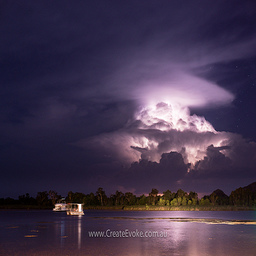

In [50]:
content_image

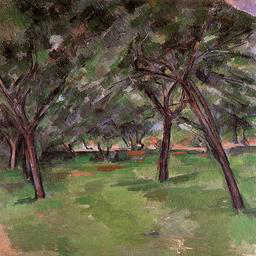

In [51]:
style_image

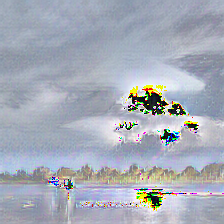

In [52]:
image